# CS 237 Fall 2019   Homework Nine Solution

### Due date: PDF file due Thursday November 14th @ 11:59PM in GradeScope with 6-hour grace period

### Late deadline:  If submitted up to 24 hours late, you will receive a 10% penalty (with same 6 hours grace period)

### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Run All" from the Cell menu before submitting. 

There are two sections to the homework: problems 1 - 7 are analytical problems about last
week's material, and the remaining problems are coding problems which will be discussed in lab next week. 

In [1]:
# General useful imports
import numpy as np
from numpy import arange,linspace, mean, var, std, sin, cos
from numpy.random import random, randint, uniform, choice, binomial, geometric, poisson
import math

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.mlab as mlab 
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from collections import Counter

#import pandas as pd
%matplotlib inline

# Basic Numpy statistical functions

X = [1,2,3]

# mean of a list
mean(X)             # might need to use np.mean, np.var, and np.std

# population variance
var(X)

# sample variance    ddof = delta degrees of freedom, df = len(X) - ddof
var(X,ddof=1)                 

# population standard deviation
std(X)

# sample standard deviation
std(X,ddof=1)


# Scipy statistical functions

# Scipy Stats Library Functions, see:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html

from scipy.stats import norm,t,binom,geom,expon,poisson,uniform,bernoulli 

# Uniform over interval [0..1)

# generate n random variates
n=1000
uniform.rvs(size=n)

# Bernoulli

# generate n random variates
p=0.5

bernoulli.rvs(p,size=n)

# Binomial:  X ~ B(n,p)

# Example parameters

k = 4
n = 10
p = 0.5

# Probability Mass Function: P(X = x) 
binom.pmf(k, n, p)

# Cumulative Distribution Function: P(X <= x) 
binom.cdf(k, n, p)

# Generate n random variates 
binom.rvs(n, p, size=n)

# Geometric Distribution X ~ G(p)

# Probability Mass Function: P(X = k)
geom.pmf(k,p)

# Cumulative Distribution Function: P(X <= k) 
geom.cdf(k,p)

# Generate n random variates 
geom.rvs(p,size=n)

# my own version of the previous which only generates rvs up to
# a limit -- this is not the same as the original distribution but
# useful for displaying data in which you want to fix the size of the display

def geom_rvs(p=0.5,size=1,limit=20):
    if size ==1:
        x = geom.rvs(p)
        while x >= limit:
            x = geom.rvs(p)
        return x
    else:
        lst = [0]*size
        for k in range(size):
            x = geom.rvs(p)
            while x >= limit:
                x = geom.rvs(p)
            lst[k] = x
        return lst

# Poisson Distribution X ~ Poisson(lam)

lam = 2
k=3

#  P(X = k)
poisson.pmf(k,lam)

#  P(X <= k) 
poisson.cdf(k,lam)

#  P(X > k) 
poisson.sf(k,lam)

# Generate n random variates 
poisson.rvs(lam,size=n)

# Exponential

# Example parameters
lam = 2         # rate parameter
beta = 1/lam      # mean
k = 2

# Probability density function
expon.pdf(k,scale=beta)

# Cumulative Distribution Function: P(X <= k) 
expon.cdf(k,scale=beta)

#  P(X > k) 
expon.sf(k,scale=beta)

# Generate n random variates 
expon.rvs(scale=beta,size=n)

# See comment above on geom_rvs(...)

def expon_rvs(b=0.5,size=1,limit=20):
    if size ==1:
        x = expon.rvs(loc=0,scale=b)
        while x > limit:
            x = expon.rvs(loc=0,scale=b)
        return x
    else:
        lst = [0]*size
        for k in range(size):
            x = expon.rvs(loc=0,scale=b)
            while x > limit:
                x = expon.rvs(loc=0,scale=b)
            lst[k] = x
        return lst


# Normal and T
# loc = mean ;  scale = std
# df = degrees of freedom (generally sample size - 1)

# Example parameters
k = 68
mu = 65.123
sd = 3
n = 10        # sample size

# probability density function
norm.pdf(x=k,loc=mu,scale=sd) 
t.pdf(x=k,df=n-1,loc=mu,scale=sd)

# P(X <= k)
norm.cdf(x=k,loc=mu,scale=sd) 
t.cdf(x=k,df=n-1,loc=mu,scale=sd)

# P(X>k)
norm.sf(x=k,loc=mu,scale=sd) 
t.sf(x=k,df=n-1,loc=mu,scale=sd)

# P(j<X<k)
j = 65
norm.cdf(x=k,loc=mu,scale=sd) - norm.cdf(x=j,loc=mu,scale=sd)
t.cdf(x=k,df=n-1,loc=mu,scale=sd) - t.cdf(x=j,df=n-1,loc=mu,scale=sd)

# Find x where P(X>x) = alpha
alpha = 0.05
norm.isf(q=alpha,loc=mu,scale=sd)
t.isf(q=alpha,df=n-1,loc=mu,scale=sd)

# Find x where P(X<x) = alpha
norm.ppf(q=alpha,loc=mu,scale=sd)
t.ppf(q=alpha,df=n-1,loc=mu,scale=sd)

#f give the endpoints of the range for the central p percent of the distribution
p = 0.90
norm.interval(alpha=p, loc=mu, scale=sd)
t.interval(alpha=p, df=n-1, loc=mu, scale=sd)

# Generate n random variates
norm.rvs(loc=mu, scale=sd, size=n)
t.rvs(df=n-1,loc=mu, scale=sd, size=n)

# See comment above on geom_rvs(...), this is same
# except limits to mu +/- limit*sigma

def norm_rvs(mu=0,sd=1,size=1,limit=4):
    lo = mu - limit*sd
    hi = mu + limit*sd
    if size ==1:
        x = norm.rvs(mu,sd)
        while x < lo or hi < x:
            x = norm.rvs(mu,sd)
        return x
    else:
        lst = [0]*size
        for k in range(size):
            x = norm.rvs(mu,sd)
            while x < lo or hi < x:
                x = norm.rvs(mu,sd)
            lst[k] = x
        return lst

# Utility functions

# set the seed to have consistent results; scipy.stats uses np.random.
def seed(n):
     np.random.seed(n)
        
# Round to 4 decimal places
def round4(x):
    return round(float(x)+0.00000000001,4)

# Round a list to 4 decimal places
def round4List(X):
    return [round4(x) for x in X]

# Round to 2 decimal places
def round2(x):
    return round(float(x)+0.00000000001,2)

# Round a list to 2 decimal places
def round2List(X):
    return [round2(x) for x in X]

# Convert float probability to string percentage
# Example:   probToPercent(0.95) => "95%"
def probToPercent(p):
    pc = p*100
    if round(pc) == pc:
        return str(round(pc)) + "%"
    else:
        return str(round(pc,2))+ "%"

def draw_distribution(Rx, fx, title='Probability Distribution for X'):
    plt.figure(figsize=(10, 6))
    plt.bar(Rx,fx,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)     
    plt.title(title)
    plt.show()
    
# This function takes a list of outcomes, calculates a histogram, and
# then draws the empirical frequency distribution.

def show_distribution(outcomes, title='Empirical Probability Distribution'):
    num_trials = len(outcomes)
    Rx = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    fx = [freqs[i]/num_trials for i in Rx]
    draw_distribution(Rx, fx, title=title)

# Analytical Problems

For the following problems, I want you to use the 
functions above from the numpy and scipy.stats libraries and provide your 
solution by printing out all answers. Round all results to 
four decimal places using <code>round4(...)</code> and report all CLs and LOSs as percentages using <code>probToPercent(...)</code> (see above code block). Remember that you do NOT round when doing calculations, but only when printing values out for the user to see. 

In addition, for this homework, when printing out p-values (which could be very small) print them out without rounding. 

For this homework I would like you to write small Python functions which does all the work for you -- I said repeatedly in lecture that these statistical procedures are just algorithms, so let's do this homework like computer scientists!

Also, I want you to use the Unicode for the plus/minus symbol. Do NOT report your confidence intervals with a lower and upper bound, but use the format shown in the next cell. 

If you write your code properly, when you have to change a parameter, such as 0.95 to 0.99, you should only have to change one number, and you may be able to reuse your code in a later problem!

These requirements are illustrated in the next problem, for which no solution is necessary. 


In [2]:
def pValue(meanSample,mean,sdSampleMean):
    if(meanSample<mean):
        p = 2 * norm.cdf(meanSample,mean,sdSampleMean)
        return p
    else:
        v = 2 * norm.sf(meanSample,mean,sdSampleMean)
        return v

def rejectNull(pValueSample,Hp):
    if pValueSample > Hp:
         print("We failed to reject the Null Hypothesis")
    else:
        print("We reject the Null Hypothesis")

## Problem Zero (Confidence Intervals)

Suppose we know that the standard deviation of the lifetime of Apple iPads is 548.82 hours, but we do not know the mean. An experiment is done by sampling 300 iPads, and the mean of this sample is found to be 3245.9 hours. 

(a) Fill in the code template 

(b) Report the mean lifetime of Apple Pens at a 95% level of confidence.

(c) Report the same at a 99% level of confidence.

In [3]:
#(a)
# Return a string representing the confidence interval
def normConfIntToString(n,xbar,s,CL):
    se = s/(n**0.5)
    (_,k) = norm.interval(alpha=CL,loc=0,scale=1)
    return str(xbar) + u" \u00B1 " + str(round4(k*se)) \
           + " to a confidence level of " + str(probToPercent(CL))
    

In [4]:
# (b)

print("(b) The mean lifetime of Apple iPads is " + normConfIntToString(300,3245.9,548.82,0.95) + ".")

(b) The mean lifetime of Apple iPads is 3245.9 ± 62.1037 to a confidence level of 95%.


In [5]:
# (c)

print("(c) The mean lifetime of Apple iPads is " + normConfIntToString(300,3245.9,548.82,0.99) + ".")

(c) The mean lifetime of Apple iPads is 3245.9 ± 81.6181 to a confidence level of 99%.


## Problem One (Hypothesis Testing)

Suppose a random number generator for a uniform distribution in [0..1) is being tested.
We know what the theoretical mean and standard deviation are supposed to be (because, although we tossed our midterm cheatsheet, we know how to find the parameters by looking up the Uniform Distribution in Wikipedia). 

We generate 100 random values and find the mean to be 0.4365. Since the mean value could be too low or too high, this is a two-tailed test. 

(a) Fill in the code template below to find the p-value for a two-tailed test. 

(b) State the null and alternative hypothesis. 

(c) Test this result at the 5% Level of Significance (LOS = probability you are wrong if you reject a hypothesis which is actually true). 

(d) Repeat the test at the 1% LOS. 

In [6]:
# Mean of the uniform is 0.5
# Standard Dev. of the uniform = sqrt of var(x) = sqrt((1/12)*(b-a)^2) = 1/sqrt(12)
# n = 100
# Ms = 0.4365
# z = Standard Dev. of sample mean = Standard Dev. of the uniform / sqrt(n)
# p.value = 2*norm.cdf(0.4365,0.5,z)


# H0 = null hyp.(in other words, Ms = M)
# H1 = Alt.hyp(opposite/Ms =/= M  or in our case 0.4365 =/= 0.5)

# compare p.value with 5% and 1%. If p<0.01/p<0.05 then we reject H0 and if p>0.01 and 0.05 then we fail to reject H0

In [7]:
print("(a)")
sm = 0.4365
m = 0.5
sdSM = (((1/12)**0.5))/100**0.5

pValue(sm,m,sdSM)

(a)


0.027827865509005994

In [8]:
print("(b)")
print("H0 = mean of the sample is the same as 0.5")
print("H1 = mean of the sample is not the same as 0.5")

(b)
H0 = mean of the sample is the same as 0.5
H1 = mean of the sample is not the same as 0.5


In [9]:
print("(c)")
rejectNull(pValue(sm,m,sdSM),0.05)

(c)
We reject the Null Hypothesis


In [10]:
print("(d)")
rejectNull(pValue(sm,m,sdSM),0.01)

(d)
We failed to reject the Null Hypothesis


## Problem Two (Hypothesis Testing)

Let $\mu$ be the (unknown) mean lifetime of Apple Pens, and suppose we set the hypothesis

$$H_0:\,\mu = 1600 \text{  hours}$$ 

and the alternative hypothesis

$$H_1:\,\mu \ne 1600 \text{  hours}$$ 

with a level of significance 

$$\alpha =  0.01.$$ 

 We do an experiment where 200 Apple Pens are tested and the mean of the lifetimes is found to be 1570 hours with a  sample standard deviation of 120 hours. Since this is a large sample (>30) we may use the sample standard deviation in place of the population standard deviation.

The hypothesis  $H_0$ will remain the same for all parts of this problem, but we will change some of the other parameters.


(a) Calculate the p-value and the result of the test as just stated.

(b) Repeat the experiment with all parameters the same except make the sample size n = 100. 

(c) We could also phrase such a test in terms of confidence intervals, i.e., we could give the result of our test as a confidence interval, and then decide whether the test result is within the confidence interval (accept) or not (reject). (This is generally not the way such tests are done, because we want to emphasize the rejection or non-rejection of the hypothesis, but it is interesting to consider the relationship between hypothesis testing and confidence intervals.)

Perform the test in (b) but phrased in terms of confidence intervals, that is, 
print out the confidence interval and then report whether to reject or fail to reject the hypothesis. 


In [11]:
print("(a)")
sm = 1570
m = 1600
sdSM = 120/200**0.5

pValue(sm,m,sdSM)

(a)


0.0004069520174449578

In [12]:
print("(b)")
sm = 1570
m = 1600
sdSM = 120/100**0.5

pValue(sm,m,sdSM)

(b)


0.012419330651552265

In [13]:
# p value from b is 0.1242 => 0.12.  100 - 0.12 = 0.88

# or does the questio ask what is our confidence percentage given that our p value is 0.12?
#z = norm.interval(alpha=0.99, loc=0, scale=1)
#o = 1570 + z * (120/100**0.5)
print("(c)")
normConfIntToString(100,1570,120,0.99)


(c)


'1570 ± 30.91 to a confidence level of 99%'

In [14]:
rejectNull(pValue(sm,m,sdSM),0.01)

We failed to reject the Null Hypothesis


## Problem Three (Hypothesis Testing)

A manufacturer claims that its medicine will eliminate all symptoms of cold and flu within 24 hours in 90% of all cases. Consumer Reports tests this claim and finds that in testing 200 people, 160 people were cured of all symptoms within 24 hours. Is the company's claim correct? Perform the test to a level of significance of 1% and observe that this is lower one-tailed test, with the critical region on the left side (low end of the normal distribution).

(a) Give the null and alternate hypotheses.

(b) Report the result of the test. Note that this is a question of proportions, since people are either cured or not. Use the binomial directly for this problem.

In [15]:
print("(a)")
print("H0 = 90")
print("HA < 90")

(a)
H0 = 90
HA < 90


In [16]:
print("(b)")
binom.cdf(160, 200, 0.90)

(b)


1.7007333197271584e-05

In [17]:
print("Since 0.00017 is less than 0.01, we reject the Null Hypothesis")

Since 0.00017 is less than 0.01, we reject the Null Hypothesis


## Problem Four (Hypothesis Testing)

The breaking strengths of cables produced by a manufacturer have a mean of 1800 lbs.  The company is hoping to increase this breaking strength considerably by a new manufacturing technique. To test this possibility, a sample of 50 cables made under the new technique is tested by an independent testing laboratory and it is found that the mean breaking strength is 1850 lbs, and the standard deviation of the sample is 100 lbs.  Should the testing lab support the move to this new technology at the 0.01 level of significance?

(a) Fill in the code template for calculating the p-value for a one-tailed test; it should
work the same for an upper or lower test. Hint: there is a very simple solution using the function pValue2(...). 

(b) State the null hypothesis and the alternate hypothesis. 

(c) Complete the test and state your conclusion. 

In [18]:
print("(a)")
sdSM = ((100))/50**0.5

norm.sf(1850,1800,sdSM)

(a)


0.0002034760087224789

(b)

H0: Mean = 1800

H1: Mean > 1800

In [19]:
print("(c)")
print("Since 0.0002 is less than 0.01, we reject the Null Hypothesis")

(c)
Since 0.0002 is less than 0.01, we reject the Null Hypothesis


## Problem   Five  (Joint Random Variables)

Suppose we roll two four-sided dice (having sides with 1, 2, 3, and 4 dots showing). Let $X$ indicate the total number of dots showing and $Y$ indicate the absolute value of the difference in the number of dots showing on each die. 

Calculate the joint probability mass function for $(X,Y)$ and the marginal probabilities for $X$ and $Y$. 

Show your results in some suitable form using a matrix drawn in text or ... 

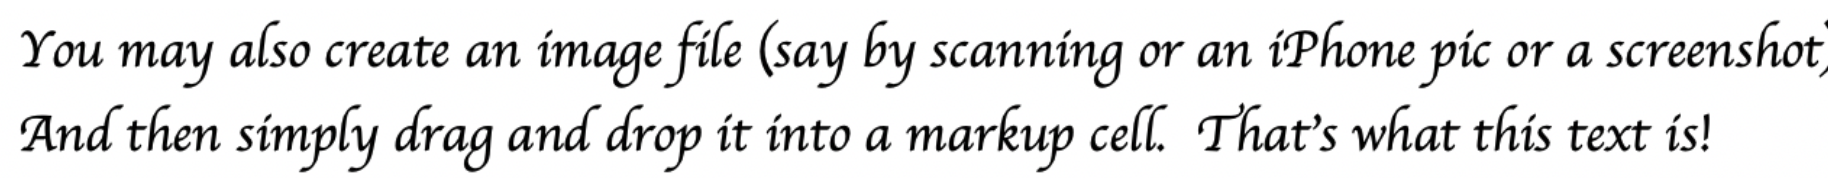

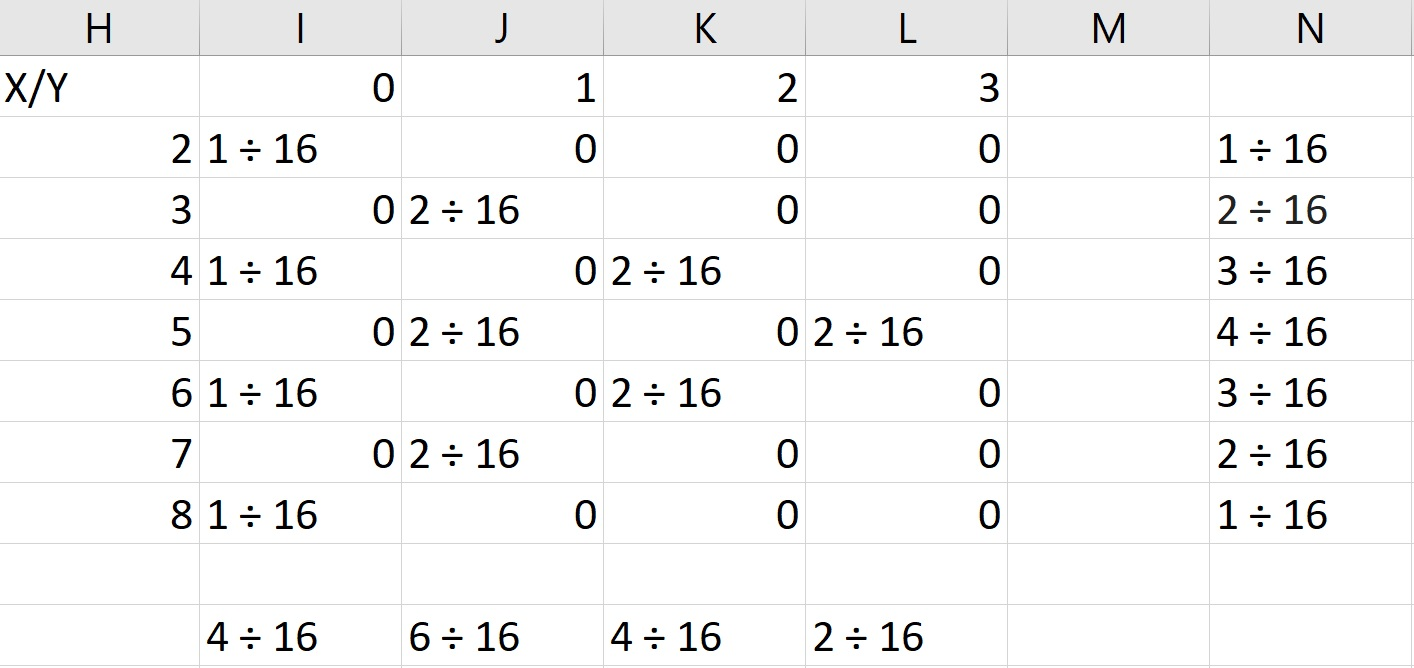

## Problem  Six  (Continuous Joint Random Variables)

(A) Suppose Wayne invites his friend Liz to brunch at the Copley Plaza. They are coming from separate locations and agree to meet in the lobby between 11:30am and 12 noon. If they each arrive at random times which are uniformly distributed in the interval, what is the probability that the longest either one of them waits is 10 minutes?

Hint: Letting $X$ and $Y$ be the time each of them arrives in minutes after 11:30am, calculate $P(|X-Y|\le 10)$ using a geometrical argument. 

(B) Let the joint probability density function of RVs $X$ and $Y$ be given by

$$  f(x,y) = \left\{\begin{alignedat}{3}
    & 8\cdot x\cdot y,     \quad\quad                        &&\text{if }   & 0\le y \le x \le 1\\
    & 0,                           &&\text{otherwise}  &
  \end{alignedat}\right.$$
  
For just the marginal distribution of $X$ calculate the probability density function $f_X(x)$ and $E(X)$. 

Hint: You will need to solve some simple integrals!


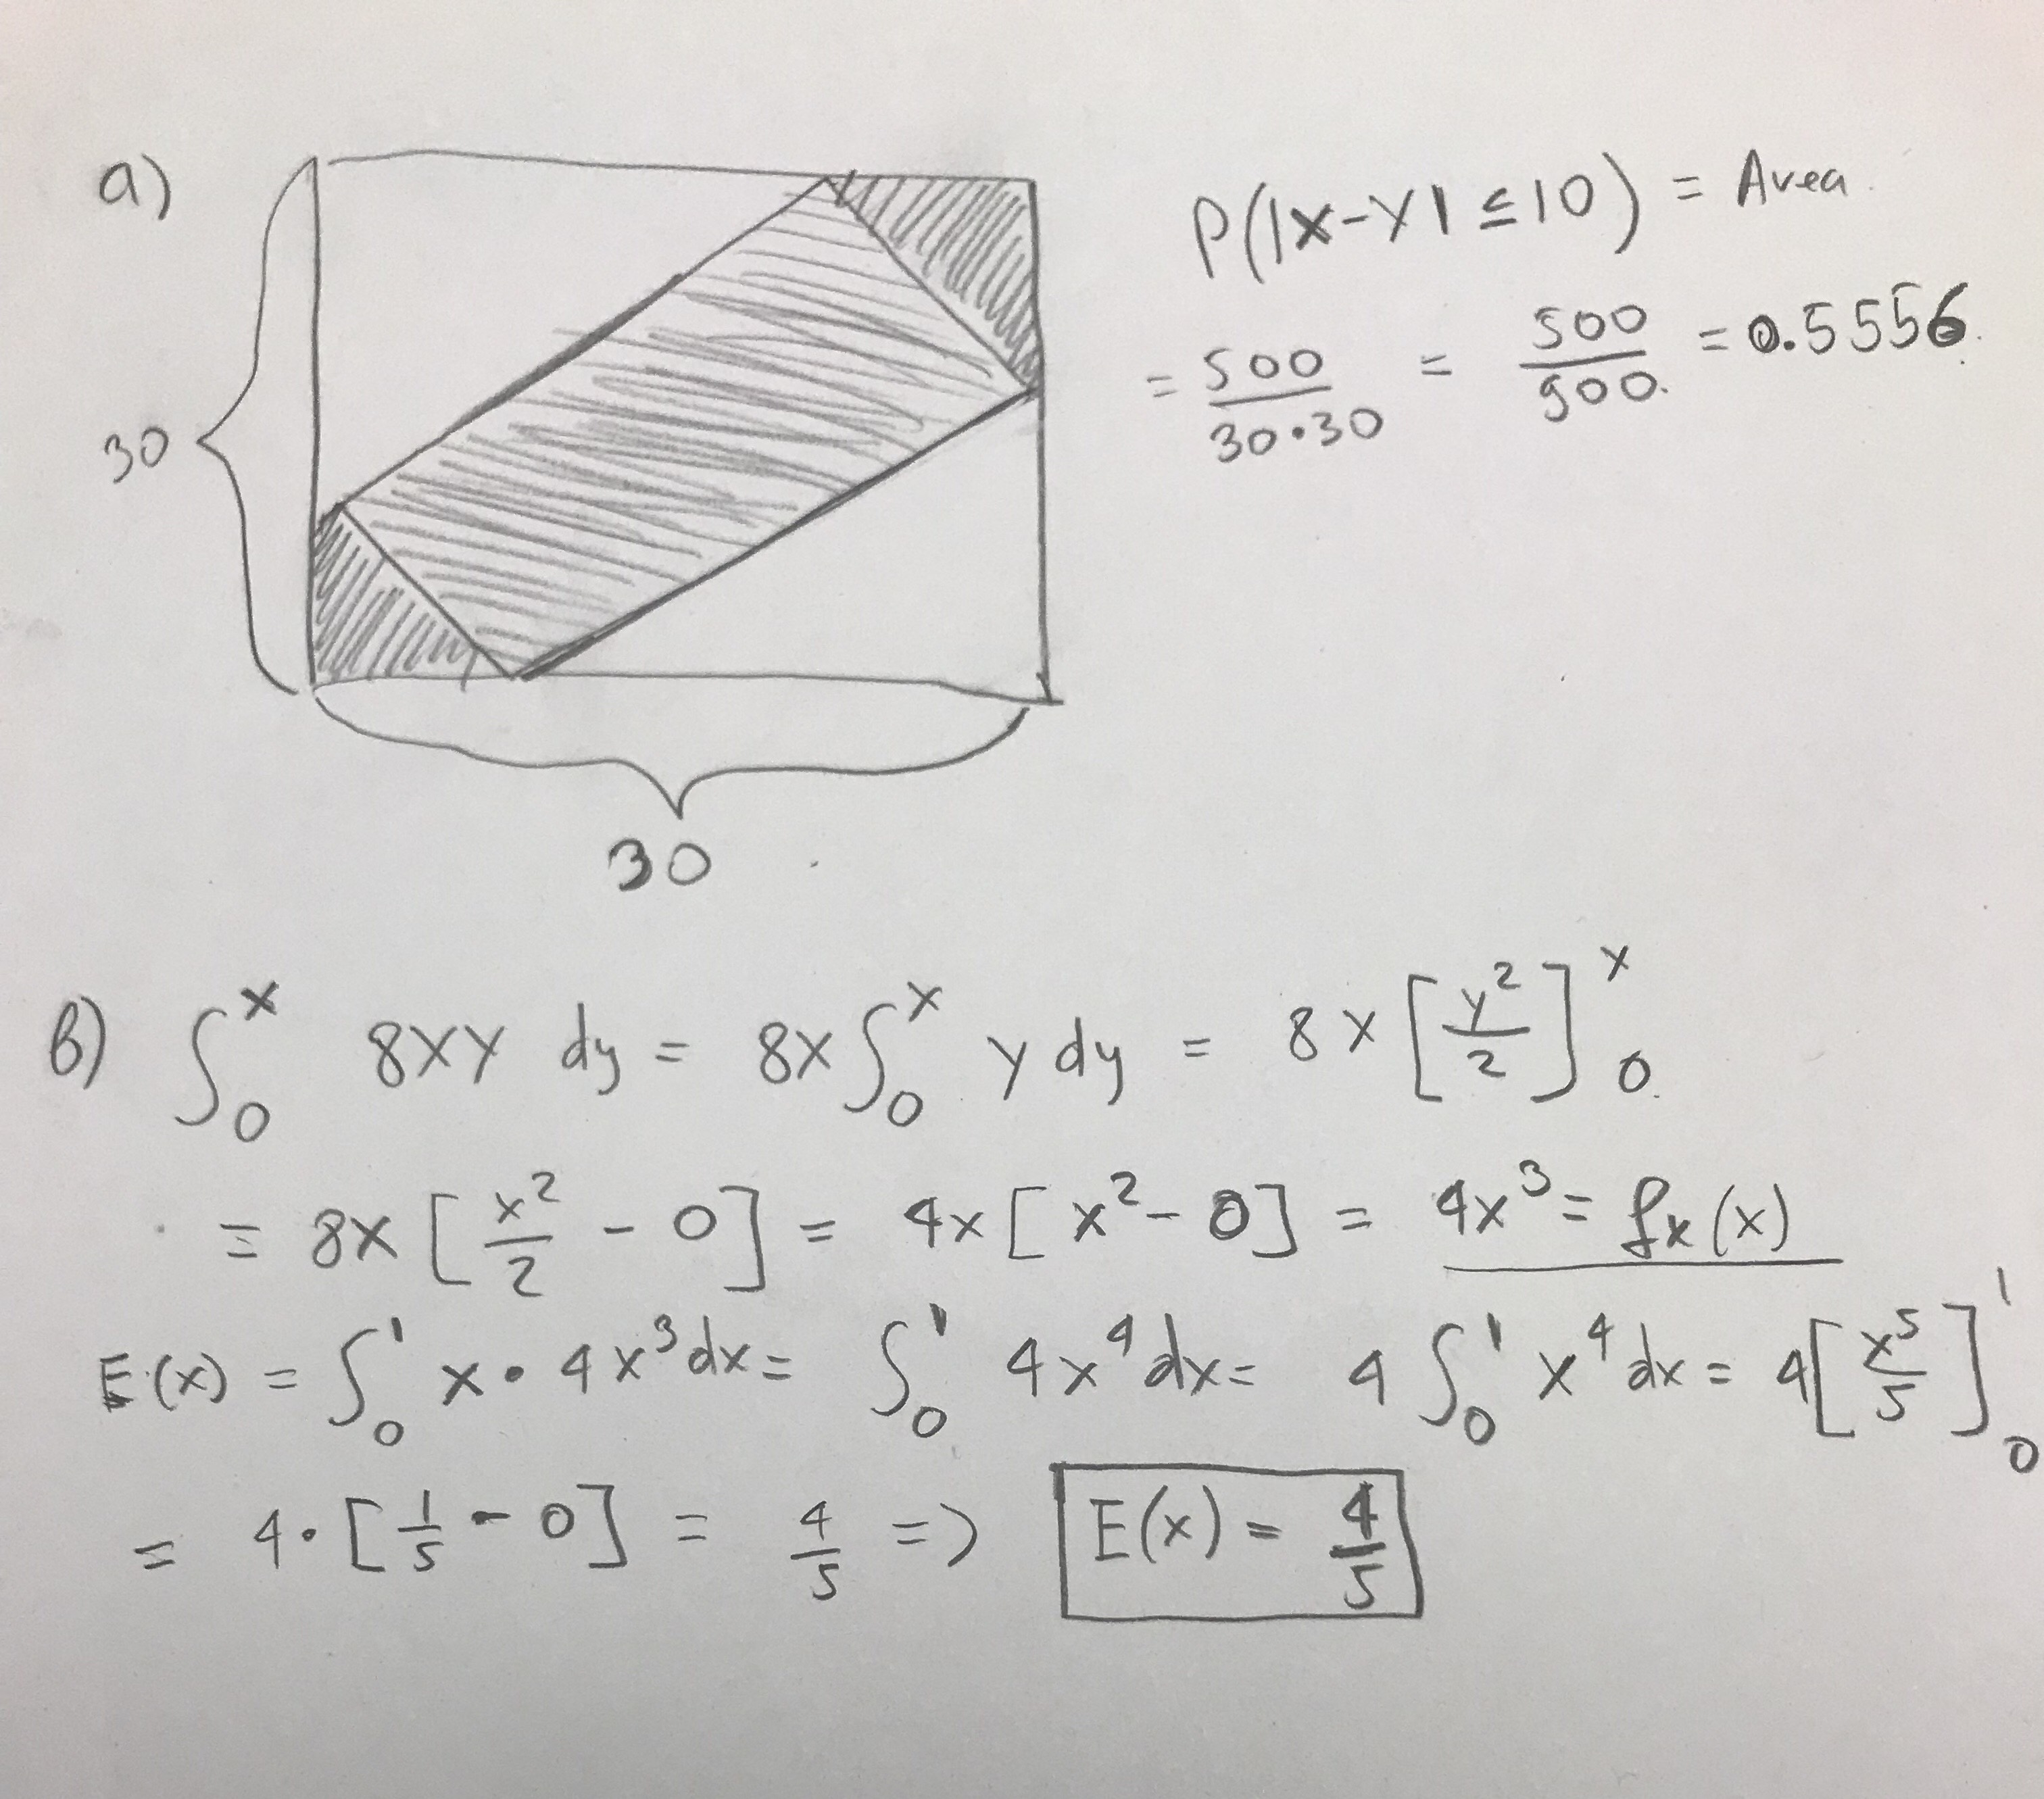

## Problem Seven   (Independent Joint Random Variables)

From an ordinary deck of 52 cards, 8 cards are drawn at random and without replacement. Let $X$ and $Y$ be the number of clubs and the number of spades, respectively. Are $X$ and $Y$ independent?

Hint: Rather than draw out the whole matrix, just use the fact that $X$ and $Y$ are independent iff

$$P(X\,\vert\, Y = k ) = P(X)\quad\text{for}\quad 0\le k\le 8.$$

Investigate whether this is true for various values of $k$, starting with $k=8$. OR, just check these cells in the matrix and see if you can find a counter-example. 

P(X = 0|Y = 8) = 1

P(X=0) = $\frac{39C8}{52C8}$ = 0.0818

We get P(X|Y = k) ≠ P(X) 

Therefore, X and Y are dependent.


## Lab  Instructions

These lab problems contain quite a bit of code that I have developed recently that displays 2D and 3D data visually, using Matplotlib. There are five problems. The first is to get you back into the mindset of hw 01, where we thought about how to draw data in two dimensions. The remainder (9 - 12) are designed to have you become familiar with the basic ideas of drawing lines and points and so on, with displaying distributions, and also with the general framework of multivariate data (which we will study for the rest of the term). I hope that these will be useful and also fun. 

You may need to refer back to homework 01 (solution with all code is posted on the class web site) for help with Pyplot.   

## Problem Eight -- Convergence of Mean of Fair Coin Flips  

Now we will return to the framework of plotting in 2D to create one of my favorite "data graphics," showing what happens when we repeatedly flip a fair coin and track the value of the mean number of flips.  

Along with this homework we are posting a PDF of the solution (without the code) for these problems so that you can see what the figures are supposed to look like. Take a look at this one now to see what you are aiming for. The idea is to draw 50 different traces of what happens when you flip a fair coin 1000 times and plot the mean number of heads. As we have discussed since literally the first day of class, this converges inevitably to 0.5. 

We have also, more recently, quantified how this converges by using the Central Limit Theorem, which enables us to quantify the standard deviation of the random variation in the mean after n flips. Essentially, we are dealing with a Bernoulli population (the individual coin flips) and after n flips, we have essentially taken a sample of size n and calculated the mean. Therefore, you can calculate the standard deviation of the mean after n flips. 

To create the figure, do the following:

   - Complete the code template below for <code>generateMeans()</code>, which generates a sequence of <code>limit</code> Bernoulli(0.5) trials and calculates a corresponding sequence of means up to that point, e.g., 
<pre>
    [1, 0,   0,      1,   1,   0,   1, ...  ]
    [1, 0.5, 0.33.., 0.5, 0.6, 0.5, 0.57... ]
</pre>

   - Create lists of length <code>limit</code> giving the bounds at each step (step n represents a sample of size n):<br>
     S1 = 0.5 + $\sigma$ for each step<br>
     S2 = 0.5 + $2\sigma$ for each step<br>
     S3 = 0.5 + $3\sigma$ for each step<br>
     S1n = 0.5 - $\sigma$ for each step<br>
     S2n = 0.5 - $2\sigma$ for each step<br>
     S3n = 0.5 - $3\sigma$ for each step
         
   - Graph num_trials sequences of means by calling generateMeans()
   - Graph each of the 6 lists giving the bounds at each step.
   
Follow the diagram in the posted solution as closely as you can, but feel free to improve it!

Hint: To check your work, the first ten values of S1 should be as follows:
<pre>
S1[:10] = [1.0, 0.8535533905932737, 0.7886751345948129, 0.75, 0.7236067977499789, 0.7041241452319316, 0.6889822365046137, 0.6767766952966369, 0.6666666666666666, 0.658113883008419]
</pre>

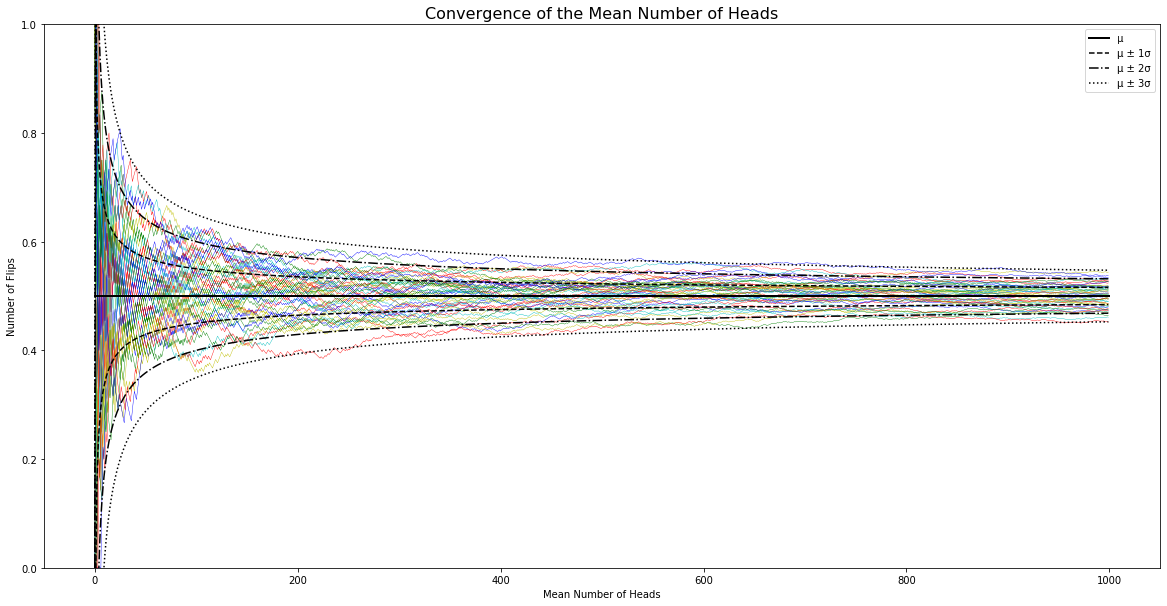

In [20]:
num_trials = 50
limit = 10**3
p=0.5
X = list(range(limit))
Y = [0]*limit

S1,S2,S3,S1N,S2N,S3N = limit*[0],limit*[0],limit*[0],limit*[0],limit*[0],limit*[0]


def generateMeans():
    d = bernoulli.rvs(p,size = limit)
    e = [0]*limit
    for i in range(limit):
        e[i] = mean(d[:(i+1)])
    return e
    
    #return []     # your code here

for i in range(1, limit):
    S1[i] = p + (p/math.sqrt(i))
    S2[i] = p + 2 * (p/math.sqrt(i))
    S3[i] = p + 3 * (p/math.sqrt(i))
    S1N[i] = p - (p/math.sqrt(i))
    S2N[i] = p - 2 * (p/math.sqrt(i))
    S3N[i] = p - 3 * (p/math.sqrt(i))

Y = [generateMeans() for x in range(num_trials)]

plt.figure(figsize=(20, 10))
plt.title('Convergence of the Mean Number of Heads',fontsize=16)
plt.ylim(0,1)

colors = ['c', 'y', 'r', 'g', 'b'] * 10
for i in range(num_trials):
    plt.plot(X,Y[i], color = colors[i],lw = 0.4 )
    

plt.plot([0,limit],[0.5,0.5],linestyle='-', color='k', lw=2,label="μ")
plt.xlabel("Mean Number of Heads")
plt.ylabel("Number of Flips")
plt.plot(X,S1,color='k',linestyle='--',label="μ ± 1σ")
plt.plot(X,S2,color='k',linestyle='-.',label="μ ± 2σ")
plt.plot(X,S3,color='k',linestyle=':',label="μ ± 3σ")
plt.plot(X,S1N,color='k',linestyle='--')
plt.plot(X,S2N,color='k',linestyle='-.')
plt.plot(X,S3N,color='k',linestyle=':')
plt.legend()

plt.show()


## Problem Nine --  Scatterplots of of Continuous Bivariate Data

First we will consider how to create *scatter plots* of random data in 2D dimensions, starting with continuous data points. We will use points from the uniform distribution over [0..1), and also the normal and exponential. 

### Part A

Complete the following function stub which will produce a scatter plot of random points (x,y) where each of x and y is produced by calls to the function uniform.rvs(size=...).

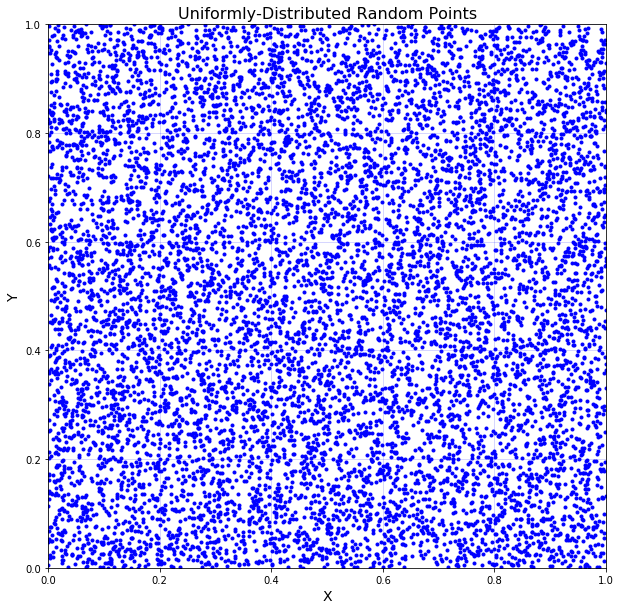

In [21]:
# (a)  

seed(0)

num_trials = 10**4

X = [uniform.rvs(size = num_trials)]        # your code here
Y = [uniform.rvs(size = num_trials)]

plt.figure(figsize=(10, 10))
plt.title('Uniformly-Distributed Random Points',fontsize=16)
plt.grid(color='b',alpha=0.2)
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(X,Y,color='b',marker='.')
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.show()


## Part B

Do the same thing for normally-distributed points using N(0,1). For this, in order to restrict the
generation of random variates, you will need to use the function 

            norm_rvs(mu=0,sd=1,size=1,limit=4):
            
which is defined in the first code cell, and which ONLY generates values in the interval $loc \pm limit*scale$, that
is, the limit is expressed in terms of standard deviations. This is ONLY for displaying data in a figure with
boundaries, and should not be used for experiments, as the distribution is not the same as for norm.rvs(...). 

For this problem, you can simply use the default parameters, i.e., just call:

            norm_rvs(size=num_trials)

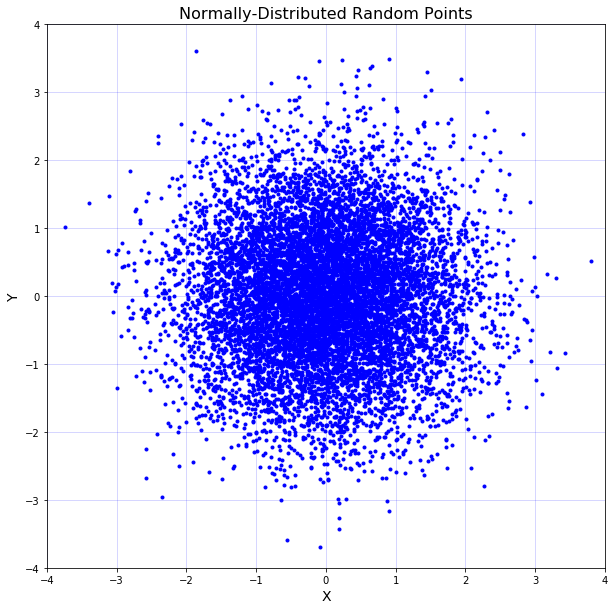

In [22]:
# (b)  

seed(0)

num_trials = 10**4

X = [norm_rvs(size=num_trials)]        # your code here
Y = [norm_rvs(size=num_trials)]

plt.figure(figsize=(10, 10))
plt.title('Normally-Distributed Random Points',fontsize=16)
plt.grid(color='b',alpha=0.2)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.scatter(X,Y,color='b',marker='.')
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.show()

## Part C

Now use the exponential distribution Exp(0.3) for the x axis and N(0,1) for the y axis. Again, you will need to use

                 expon_rvs(b=0.3,size=1,limit=20)
                 
to limit the range of the random variates. You may simply use

                 expon_rvs(size=num_trials)


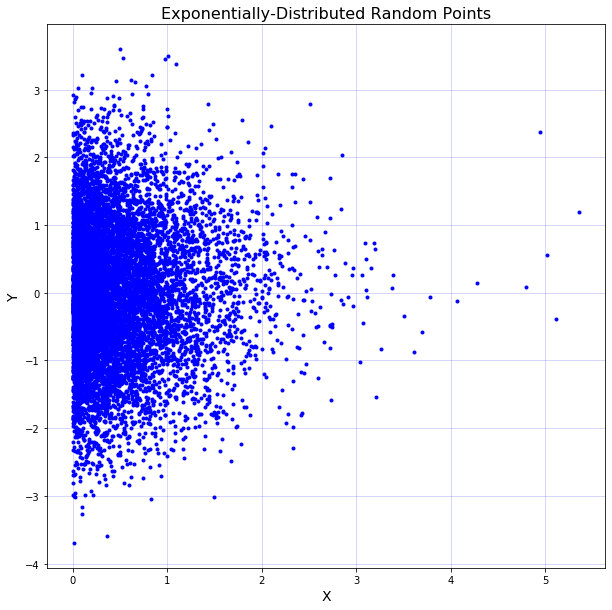

In [23]:
# (c)  

seed(0)

num_trials = 10**4

X = [expon_rvs(size = num_trials)]        # your code here
Y = [norm_rvs(size = num_trials)]

plt.figure(figsize=(10, 10))
plt.title('Exponentially-Distributed Random Points',fontsize=16)
plt.grid(color='b',alpha=0.2)
plt.scatter(X,Y,color='b',marker='.')
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.show()

In [24]:
## Part D -- Be Creative

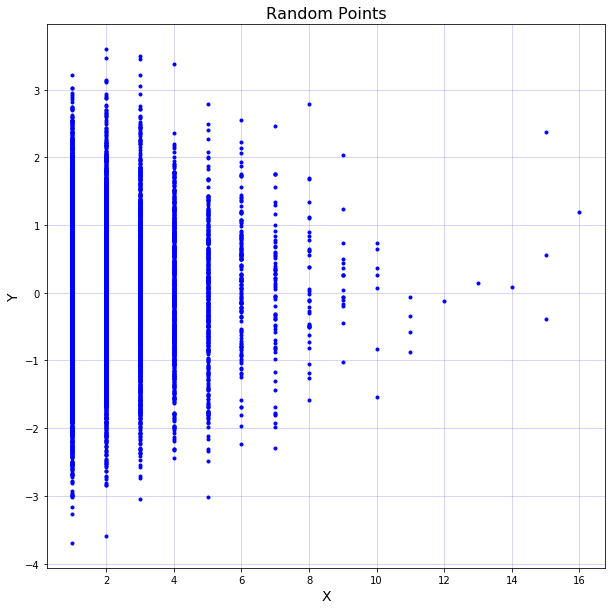

In [25]:
seed(0)

num_trials = 10**4

X = [geom_rvs(size = num_trials)]        # your code here
Y = [norm_rvs(size = num_trials)]

plt.figure(figsize=(10, 10))
plt.title('Random Points',fontsize=16)
plt.grid(color='b',alpha=0.2)
plt.scatter(X,Y,color='b',marker='.')
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.show()

## Problem Ten -- Heatmaps of Discrete Bivariate Data

Plotting random discrete data is a bit different, as we can't just plot the points, because
we have no obvious way to show when more than one value is plotted to the same point.
Therefore, we have to use some kind of histogram to show the frequencies
in each "bin," except that now we have an additional dimension.

A <b> heatmap</b> is a histogram which lays out the bins in a 2D matrix, and shows the frequency
by color: in our case, brighter colors indicate higher frequencies. 

We will try different distributions on each axis, as in the last problem, using the the 
discrete uniform, binomial, and geometric. These are the discrete analogues of the distributions in the previous problem, and you should try to see the correspondence.

In [26]:
# Draw 2D histogram from integer data

def draw_heatmap(X,Y,limit=20):

    # create histogram from X, Y data
    
    A = [[0 for i in range(limit)] for j in range(limit)]
    
    for k in range(len(X)):
        A[X[k]][Y[k]] +=1       

    plt.figure(figsize=(10,10))
    plt.imshow(A, cmap='hot', origin='lower',interpolation='nearest')
    plt.show()

## Part A

As in the previous problem, you will generate X and Y data values, but in this case you will use

                 randint(20)
                 
to generate num_trials integer variates in the range [0..20) for both the X and Y axes. 

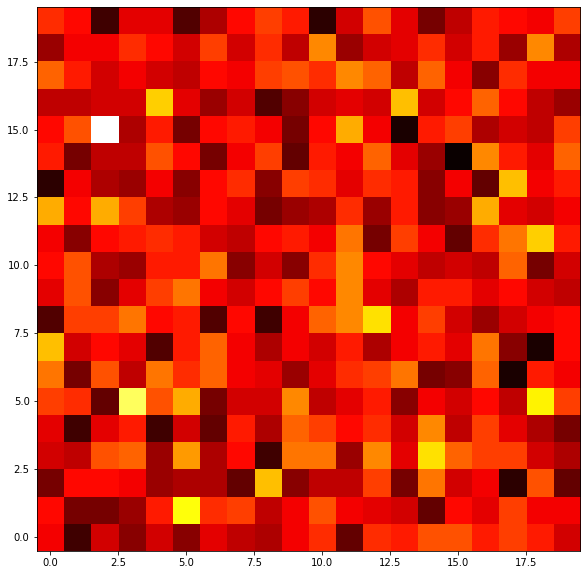

In [27]:
# (a) 

seed(0)

num_trials = 10**4

n = 20

X = [randint(20) for i in range(num_trials)]        # your code here
Y = [randint(20) for i in range(num_trials)]

draw_heatmap(X,Y,n)

## Part B

Do the same thing, but using 

                binom.rvs(n,p)
                
on both axes. 

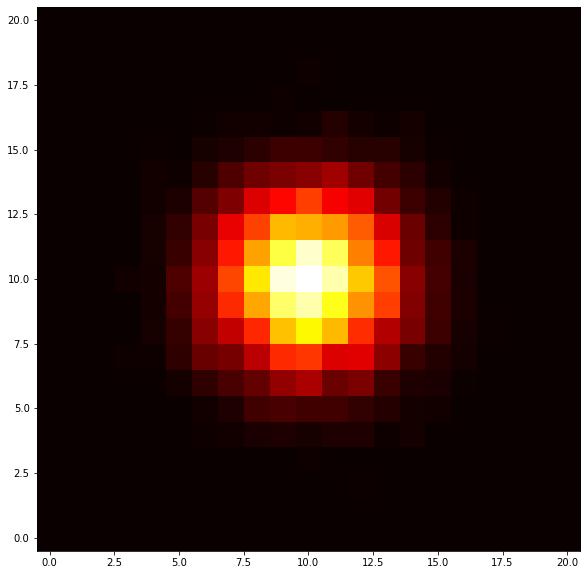

In [28]:
# (b) 

seed(0)
num_trials = 10**4

p = 0.5
n = 20

X = [binom.rvs(n,p) for i in range(num_trials)]        # your code here
Y = [binom.rvs(n,p) for i in range(num_trials)]

draw_heatmap(X,Y,n+1)

## Part C

Once more, but using 

             geom_rvs(p)
             
Note that this was defined in the first code cell to limit the outputs, because of its infinite potential range. 

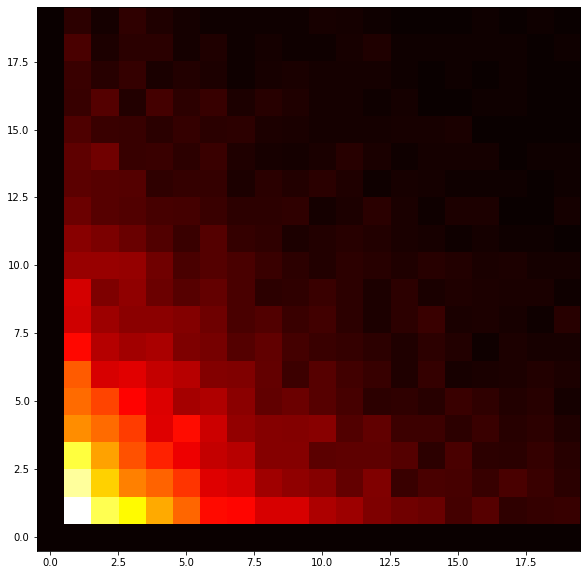

In [29]:
seed(0)

num_trials = 10**4

p = 0.15

X = [geom_rvs(p) for i in range(num_trials)]        # your code here
Y = [geom_rvs(p) for i in range(num_trials)]

draw_heatmap(X,Y)


## Part D -- Be Creative

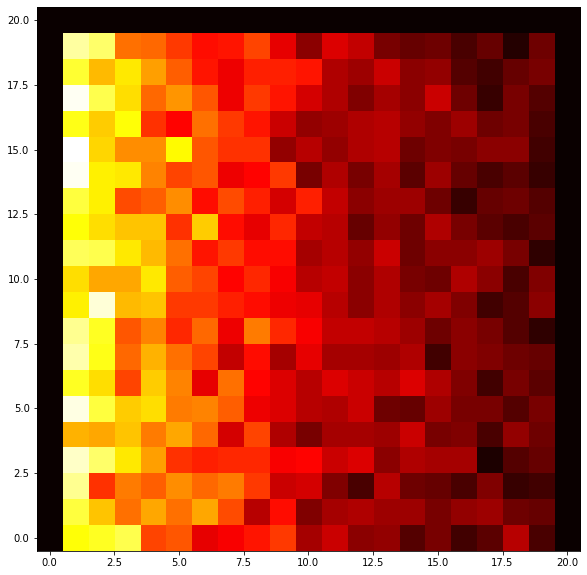

In [30]:
# (d) 
seed(0)

num_trials = 10**4

X = [randint(20) for i in range(num_trials)]        # your code here
Y = [geom_rvs(0.1) for i in range(num_trials)]

draw_heatmap(X,Y,n+1)


## Problem Eleven -- Display of Discrete Bivariate data in 3D

An alternative to the heatmap is to draw discrete bivariate data in "faux 3D" where the perspective gives the
idea of real 3D data. Sophisticated drawing programs will allow the user to rotate the view in real time, but for now
we will simply explore a simple 3D framework in Matplotlib from a single perspective. 

In [31]:
def draw_3D_histogram(Xdata,Ydata,limit):
    
    # create histogram from X, Y data
    
    A = [[0 for i in range(limit)] for j in range(limit)]
    
    for k in range(len(Xdata)):
        A[Xdata[k]][Ydata[k]] +=1  
        
    # now create data for bars
    
    X = []
    Y = []
    Z = []
    
    for i in range(limit):
        for j in range(limit):
            if A[i][j] > 0:
                X.append(i)
                Y.append(j)
                Z.append(A[i][j])
    
       
    # setup the figure and axes
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.view_init(30, 60)

    bottom = np.zeros_like(Z)

    ax.set_title('3D Histogram')

    ax.set_xlim((0,limit))
    ax.set_ylim((0,limit))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Frequency')
    
    ax.bar3d(X, Y, bottom, 1, 1, Z)

    plt.show()


## Part A

Repeat problem 10 (a) with the same data, but using a 3D histogram. 

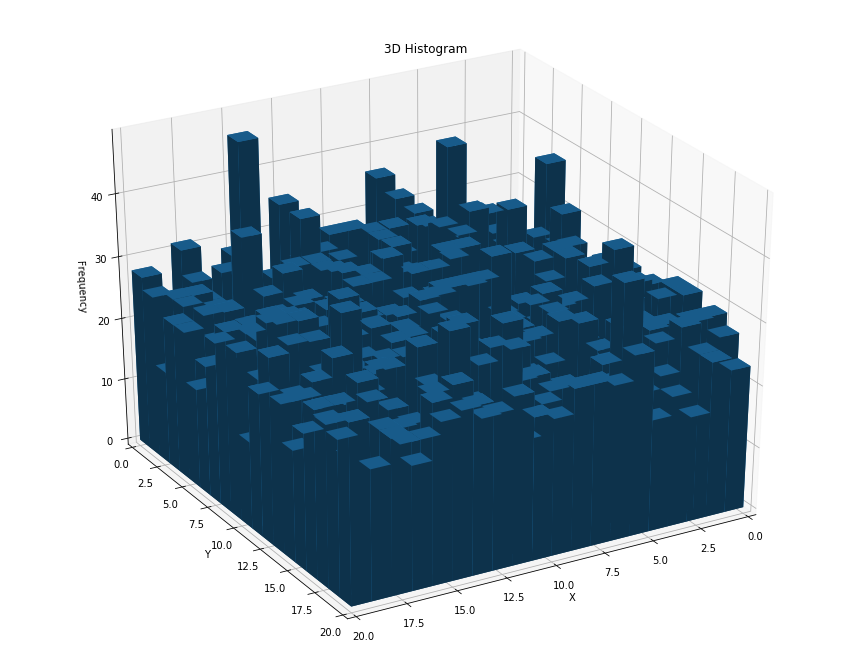

In [32]:
seed(0)

num_trials = 10**4

n = 20

X = [randint(20) for i in range(num_trials)]        # your code here
Y = [randint(20) for i in range(num_trials)]

draw_3D_histogram(X,Y,n)

## Part B

Repeat problem 10 (b) with the same data, but using a 3D histogram.

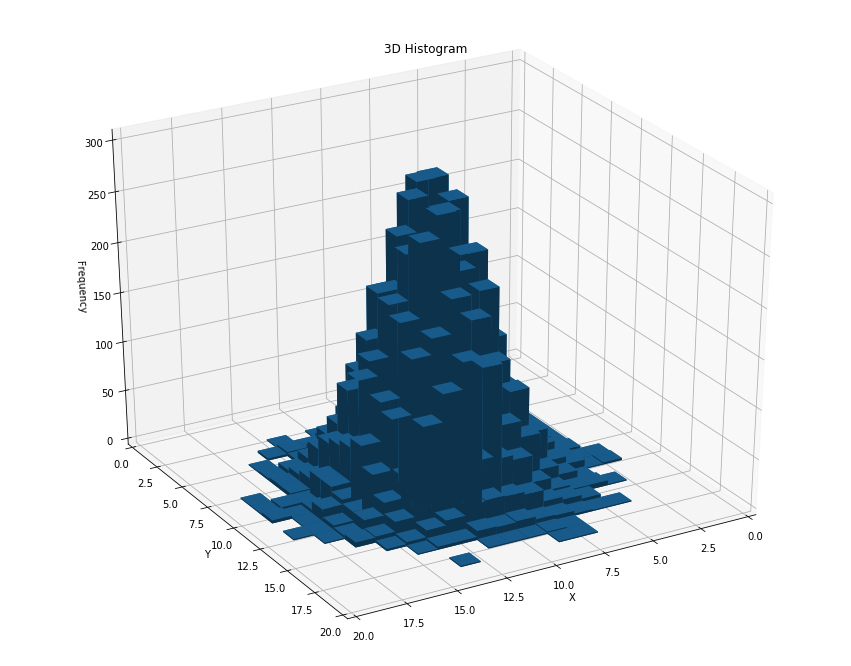

In [33]:
seed(0)
          
num_trials = 10**4

p = 0.5
n = 20

X = [binom.rvs(n,p) for i in range(num_trials)]        # your code here
Y = [binom.rvs(n,p) for i in range(num_trials)]

draw_3D_histogram(X,Y,n)

## Part C

Repeat problem 10 (c) with the same data, but using a 3D histogram.

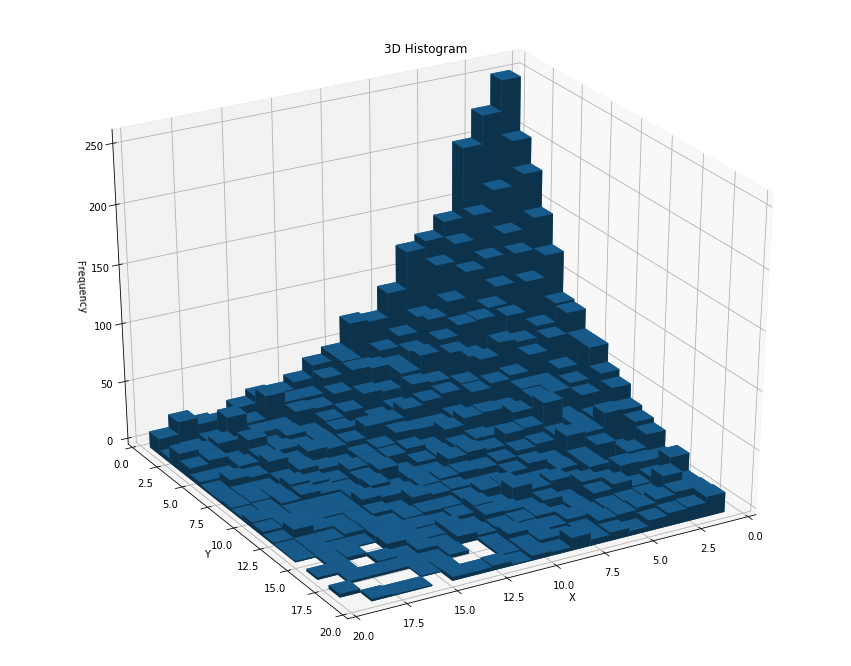

In [34]:
seed(0)

num_trials = 10**4

p = 0.15

X = [geom_rvs(p) for i in range(num_trials)]        # your code here
Y = [geom_rvs(p) for i in range(num_trials)]

draw_3D_histogram(X,Y,20)

## Part D -- Be Creative!

Repeat problem 10 (d) with the same data, but using a 3D histogram. You may do the same exact thing or try something different!

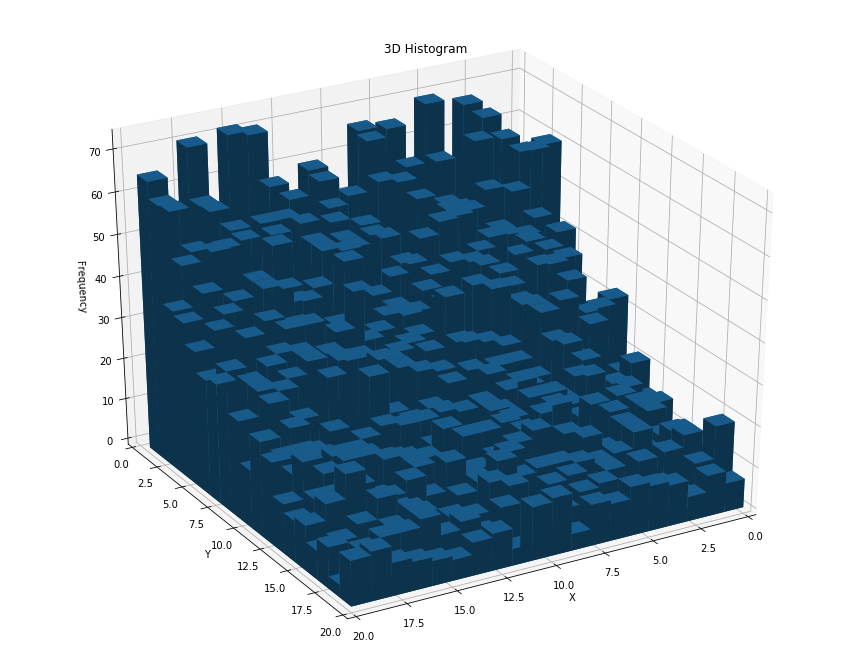

In [35]:
seed(0)

num_trials = 10**4

p = 0.3
n = 20

X = [randint(20) for i in range(num_trials)]        # your code here
Y = [geom_rvs(0.1) for i in range(num_trials)]

draw_3D_histogram(X,Y,n)

## Problem Twelve -- Plotting 3D data in 3D

Finally, we will explore the use of 3D scatterplots to display continuous data. We will choose a volume which is 2 units on a size, with the origin in the center, so the 8 corners will be (1,1,1), (1,1,-1), and so on. 


In [36]:
def draw_3D_scatter(X1,Y1,Z1):

    lim = 1

    # make the X,Y grid

    X = np.linspace(-lim, lim+lim*0.005, 100)
    Y = np.linspace(-lim, lim+lim*0.005, 100)
    X, Y = np.meshgrid(X, Y)

    # Draw the figure

    fig = plt.figure(figsize=(14,12))
    ax = fig.gca(projection='3d')
    #ax.view_init(elev=20, azim=-60)         # <==  set viewing angle here
    ax.view_init(elev=20, azim=-160)
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_zlim(-lim,lim)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # plot reference grid
    # planes
    ax.plot_surface(X, Y, np.zeros((100,100), dtype=int), alpha=0.1)
    ax.plot_surface(X, np.zeros((100,100), dtype=int), Y, alpha=0.1)
    ax.plot_surface(np.zeros((100,100), dtype=int), X, Y, alpha=0.1)
    # lines
    ax.plot([0,0],[0,0],[-lim,lim],c='k', alpha=0.5)
    ax.plot([0,0],[-lim,lim],[0,0],c='k', alpha=0.5)
    ax.plot([-lim,lim],[0,0],[0,0],c='k', alpha=0.5)
    # origin point
    ax.scatter([0],[0],[0])

    # plot the random points

    ax.scatter(X1, Y1, Z1, color='b',marker='.')

    plt.show()



## Part A

Now plot 3D data with a uniform distribution along each axis, scaled and shifted into the range [-1..1]:

            2*uniform.rvs(size=num_trials) - 1
    
    

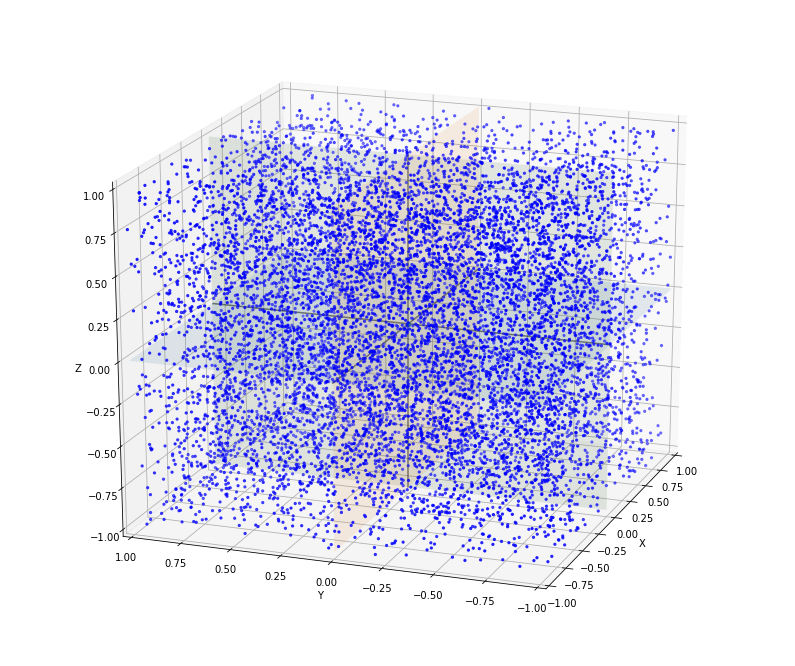

In [37]:
seed(0) 
num_trials = 10**4
   
X = [2*uniform.rvs(size=num_trials) - 1 ]     # your code here
Y = [2*uniform.rvs(size=num_trials) - 1 ]     # your code here
Z = [2*uniform.rvs(size=num_trials) - 1 ]     # your code here

draw_3D_scatter(X,Y,Z)

## Part B

Now plot 3D data with the normal distribution along each axis, using

            norm.rvs(0,0.25,size=num_trials) 
    
    

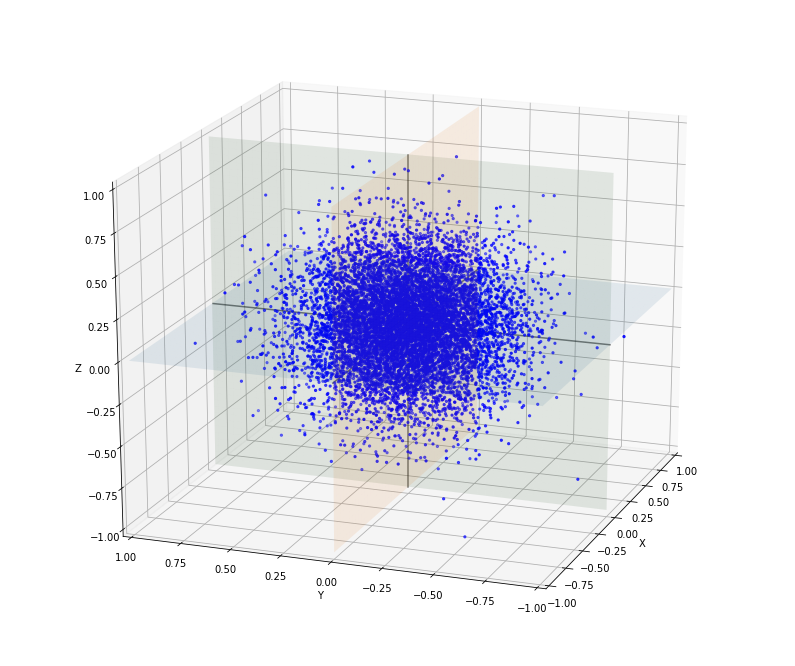

In [38]:
seed(0) 
num_trials = 10**4
   
X = [norm.rvs(0,0.25,size=num_trials)]     # your code here
Y = [norm.rvs(0,0.25,size=num_trials)]     # your code here
Z = [norm.rvs(0,0.25,size=num_trials)]     # your code here

draw_3D_scatter(X,Y,Z)

## Part C

Now plot 3D data with the exponential distribution along each axis, but shifted so that it
starts in the "front corner" of the cube:

            expon_rvs(0.3,limit=2)-1
        
You will need to explicitly create a list of num_trial variates for this one (you can't use the size parameter, because of the shifting).
    

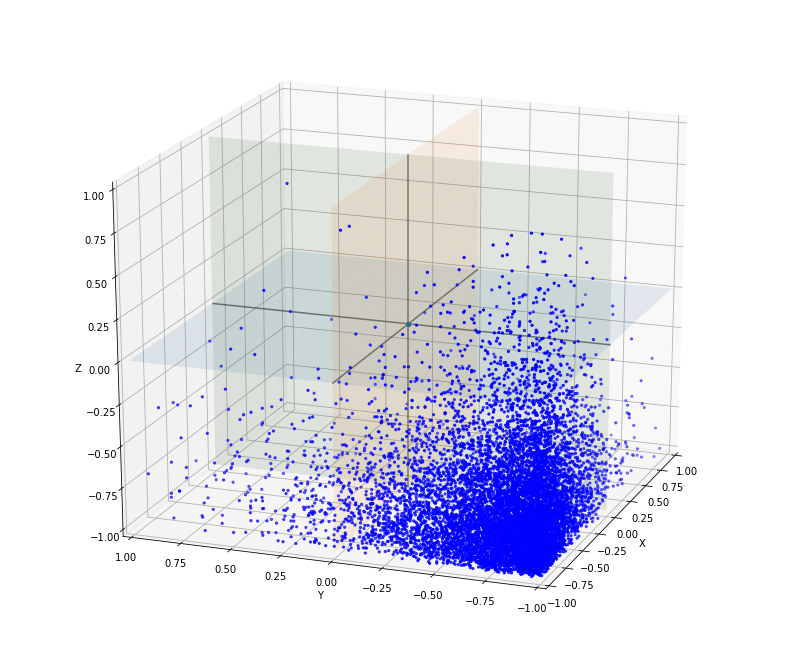

In [39]:
seed(0) 
num_trials = 10**4
   
X = [(expon_rvs(0.3,limit=2)-1) for i in range(num_trials)]     # your code here
Y = [(expon_rvs(0.3,limit=2)-1) for i in range(num_trials)]     # your code here
Z = [(expon_rvs(0.3,limit=2)-1) for i in range(num_trials)]     # your code here

draw_3D_scatter(X,Y,Z)

## Part D

Now try your own, mixing the three distributions. 


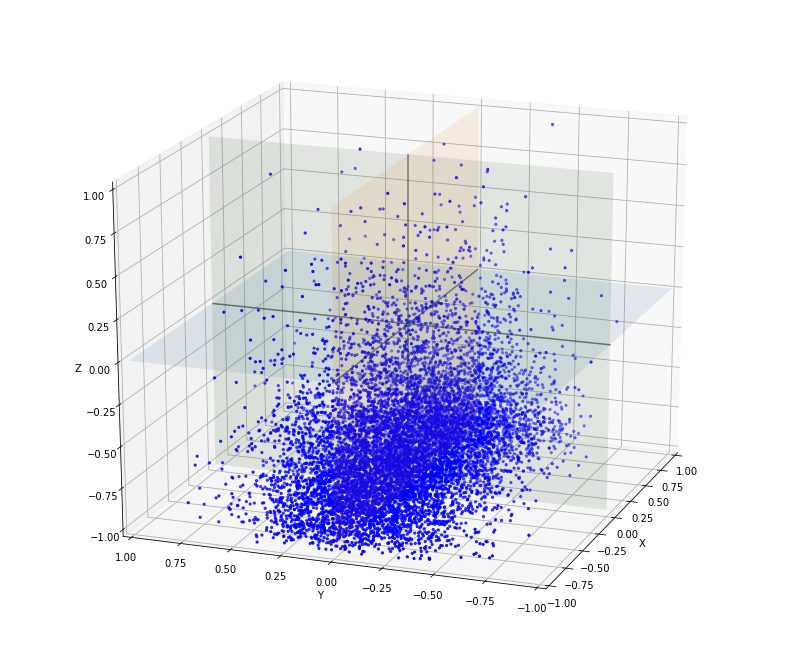

In [40]:
seed(0) 
num_trials = 10**4
   
X = [2*uniform.rvs(size=num_trials) - 1]     # your code here
Y = [norm.rvs(0,0.25,size=num_trials)]     # your code here
Z = [(expon_rvs(0.3,limit=2)-1) for i in range(num_trials)]     # your code here

draw_3D_scatter(X,Y,Z)